# Project: Visualizing The Stock Market: Decoding the S&P 500

> *"We search through historical data to find anomalies... We don't start with models. We start with data."* — **Jim Simons**, Mathematician, Philantrophist & Founder of Renaissance Technologies.

---

### The Mission
Welcome, Analyst. You are no longer just a student; today, you are a quantitative researcher entering the high-dimensional arena of the S&P 500. 

In the world of elite hedge funds, the market is not viewed as a simple list of stock prices. It is seen as a chaotic, breathing ecosystem of **signals buried in mountains of noise.** The legends of the field (Jim Simons, Ken Griffin, Ray Dalio) didn't build their empires by following the news. They built them by developing a "visual intuition" for the invisible structures that govern the global economy.

### The Challenge
How do you visualize 500 companies moving simultaneously across thousands of days? How do you see the "DNA" of a sector or the hidden gravitational pull that one stock exerts on another? 

This project is designed to take you from raw data ingestion to the **Frontier of Alpha**. Over the course of this notebook, you will:

1.  **Ingest the Pulse:** Stream 5 years of market-wide data, learning to spot the "gaps" where information is lost.
2.  **Expose the Skeleton:** Use hierarchical clustering to reveal the "tribes" of the market—seeing how stocks group together regardless of their official sector labels.
3.  **Warp Dimensions:** Apply advanced dimensionality reduction techniques: **PCA (Principal Component Analysis)** and **t-SNE**, to compress a 500-dimensional market into a 2D "map" you can actually navigate.

### The Goal
By the end of this investigation, you won't just see a line chart. You will see the **latent clusters** and **anomalous outliers** that the rest of the market is blind to. You are about to build a "GPS" for the financial markets.

**First, use the following code snippet to set a plot style close to those used in financial markets.**

---

In [ ]:
# Apply a visual "Quant" style
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

# Setting a dark, high-contrast theme for that "Trading Floor" feel
plt.style.use('dark_background')
sns.set_context("talk")
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "grid.alpha": 0.1}
sns.set_theme(style="darkgrid", rc=custom_params)

# For interactive Plotly charts, we use a dark template
pio.templates.default = "plotly_dark"

## Part 1: Getting and cleaning the data

**The Objective:** 
In quantitative finance, your model is only as good as your data—a concept known as *Garbage In, Garbage Out*. A true Quant doesn't just download a CSV; they investigate the "health" of their data before a single trade is placed. 

In this part, you will fetch the daily historical data for the current S&P 500 constituents. While it is tempting to use a small subset, we want to see the *entire* universe to understand systemic risk. We will use the `yfinance` library to scrape this data from the web.

### Your Tasks:
1.  **Retrieve Tickers:** Programmatically retrieve the list of current S&P 500 tickers (Hint: Wikipedia's "List of S&P 500 companies" table is the industry-standard source for this).
2.  **Download Historical Data:** Download the last **5 years** of daily data for these tickers. Focus specifically on the **Adjusted Close** price. 
    *   *Note: Downloading 500+ tickers may take a few minutes. If your hardware is struggling, you may choose to proceed with a subset (e.g., the first 100 tickers), but try for the full set first!*
3.  **Visualize Data Completeness:** Create a "Missingness Map" or a "Data Integrity Heatmap." In finance, missing data is often a "trap" (e.g., a company was delisted, merged, or newly added). You need to visualize which stocks have gaps or incomplete histories.

### Critical Thinking Questions:
*   **Price vs. Adjusted Price:** Why do quantitative analysts almost exclusively use "Adjusted Close" instead of "Close" when calculating historical returns? (Hint: Think about dividends and stock splits).
*   **The Survival Bias:** By downloading data for the *current* S&P 500 companies, are we ignoring companies that were in the index 5 years ago but went bankrupt or were removed? How might this "Survivorship Bias" skew your final visualizations?
*   **The Imputation Dilemma:** If a stock is missing 5% of its data in the middle of a time series, should you "fill" it using the previous day's price (Forward Fill) or delete the stock from your study entirely? What are the risks of both?

---

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from datetime import datetime, timedelta

# 1. Retrieve S&P 500 Tickers from Wikipedia
print("Fetching S&P 500 ticker list...")
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Use a User-Agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

try:
    response = requests.get(url, headers=headers)
    # Use pandas to read the HTML content from the response text
    table = pd.read_html(response.text)
    sp500_df = table[0]
    tickers = sp500_df['Symbol'].tolist()
    print(f"Successfully retrieved {len(tickers)} tickers.")
except Exception as e:
    print(f"Error fetching tickers: {e}")
    # Fallback: A tiny subset in case Wikipedia is completely unreachable
    tickers = tickers = [
    'AAPL', 'MSFT', 'NVDA', 'AMD', 'GOOG', 'META', # Big Tech
    'JPM', 'BAC', 'GS', 'MS', 'WFC', # Banks
    'XOM', 'CVX', 'COP', 'SLB', # Energy
    'JNJ', 'PFE', 'MRK', 'LLY', # Pharma
    'KO', 'PEP', 'PG', 'WMT', 'COST', # Consumer Staples
    'BA', 'CAT', 'LMT', # Industrial
    'NEE', 'DUK' # Utilities
]
    
# Yahoo Finance uses '-' instead of '.' for tickers like BRK.B
tickers = [t.replace('.', '-') for t in tickers]

# 2. Download 5 Years of Historical Data
# We focus only on 'Adj Close' to account for dividends and splits.
print(f"Downloading data for {len(tickers)} tickers. This may take a moment...")
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

# Downloading the full universe
raw_data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Close']


Fetching S&P 500 ticker list...


C:\Users\ISMAIL\AppData\Local\Temp\ipykernel_32076\3935595736.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(response.text)


Successfully retrieved 503 tickers.


[*********************100%***********************]  503 of 503 completed


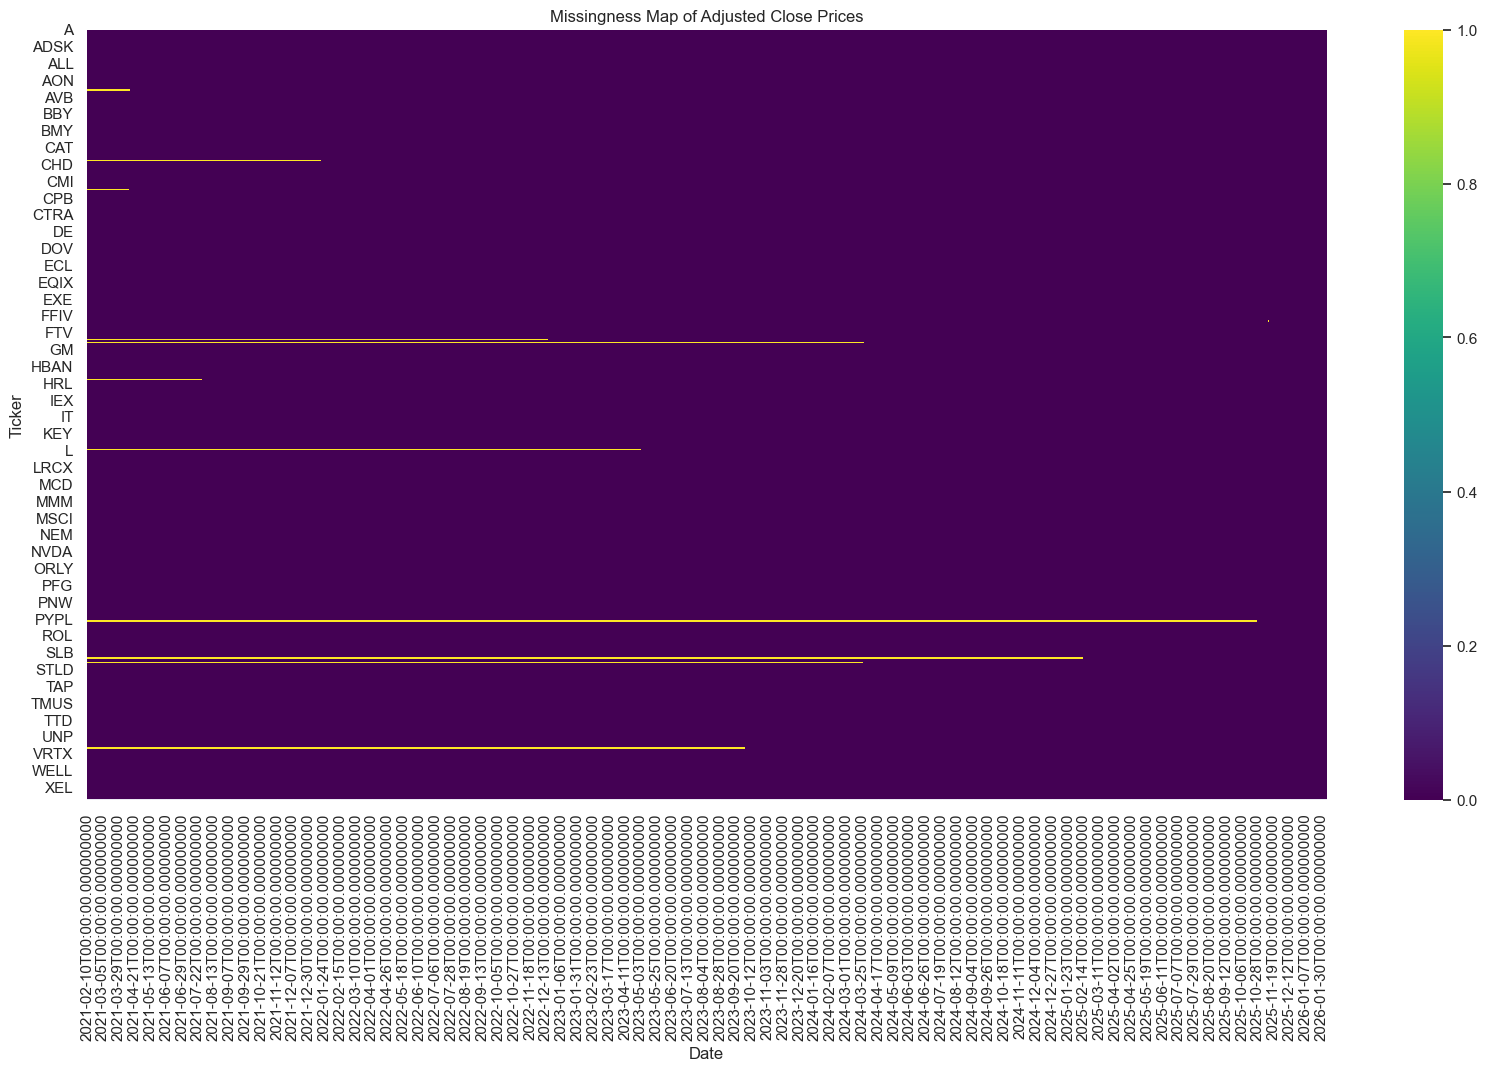

In [3]:
########## Write the rest of your code for Part 3 in this cell ############
missing_data = raw_data.isna()

plt.figure(figsize=(20, 10))
sns.heatmap(missing_data.T, cbar=True, cmap='viridis')
plt.title("Missingness Map of Adjusted Close Prices")
plt.xlabel("Date")
plt.ylabel("Ticker")
plt.show()


## Part 2: Volatility & Risk

**The Objective:** 
In the world of quantitative trading, **Price is a liar.** A $10 move in a $100 stock is massive; a $10 move in a $3,000 stock is noise. To compare apples to apples, Quants transform prices into **Log Returns** or **Percentage Returns**. This process, known as making the data "stationary," allows us to apply statistical models.

In this section, you will stop looking at how much a stock is *worth* and start looking at how much it *moves*. We will explore "Volatility" (the heartbeat of the market) and visualize the distribution of returns to see if the market truly follows a "Normal Distribution" (spoiler: it usually doesn't).

### Your Tasks:
1.  **Calculate Daily Returns:** Convert your cleaned price dataframe into daily percentage changes. 
2.  **The Heartbeat (Volatility Map):** Calculate the rolling 30-day standard deviation (volatility) for the entire S&P 500. Create a visualization that compares the volatility of different **Sectors** (e.g., are Tech stocks objectively "shakier" than Consumer Staples?).
3.  **The Distribution of Fear:** Plot a Histogram of the daily returns for the S&P 500 index. Overlay a "Normal Distribution" curve over it (hint: use the mean and the standard deviation of the whole dataset). 
4.  **Interactive Deep Dive:** Use `Plotly` to create a professional-grade interactive Candlestick chart for a few high-profile stocks (e.g., NVDA, TSLA, or MSFT). Include a subplot for **Volume** to see if price moves are backed by "conviction."

### Critical Thinking Questions:
*   **The Fat Tail Problem:** When you look at the Histogram of returns, do the "tails" (the extreme ends) match the Normal Distribution curve? If the "tails" are thicker (Kurtosis), what does that imply about the frequency of market crashes versus what standard statistics predict?
*   **Volatility Clustering:** Look at a time-series plot of returns (pick a stock of your choice). Do you notice that "calm" periods are followed by calm, and "volatile" periods are followed by volatile ones? This is a famous phenomenon. How would a trader use this information?
*   **The Volume Signal:** In your candlestick chart, look for a day with a massive price move. Was the Volume higher than average that day? Why do Quants say "Volume precedes price"?

---

In [ ]:

########## Write your code in this cell ############

threshold = 0.05 * len(raw_data)
cleaned_data = raw_data.dropna(thresh=len(raw_data) - threshold, axis=1)
cleaned_data = cleaned_data.ffill()

returns = cleaned_data.pct_change().dropna()

print(f"Original tickers: {raw_data.shape[1]} | Cleaned tickers: {returns.shape[1]}")
print("--- Returns Head ---")
print(returns.head())

Original tickers: 503 | Cleaned tickers: 494
--- Returns Head ---
Ticker             A      AAPL      ABBV      ABNB       ABT      ACGL  \
Date                                                                     
2021-04-16  0.009754 -0.002528  0.009542  0.019048  0.003308 -0.005706   
2021-04-19 -0.008025  0.005068  0.006487 -0.023001  0.001448 -0.009481   
2021-04-20 -0.007790 -0.012830  0.003867 -0.028697 -0.036377 -0.011587   
2021-04-21  0.010343  0.002930  0.016234 -0.014743  0.021667  0.016565   
2021-04-22  0.005230 -0.011686 -0.006769  0.021787  0.007341 -0.006267   

Ticker           ACN      ADBE       ADI       ADM  ...        WY      WYNN  \
Date                                                ...                       
2021-04-16  0.006347  0.003497 -0.007467  0.013295  ...  0.021034 -0.005003   
2021-04-19 -0.001463 -0.016969 -0.016300 -0.002691  ... -0.011190 -0.007857   
2021-04-20  0.007190 -0.003797 -0.015550 -0.009783  ... -0.012860 -0.036744   
2021-04-21  0.007345

C:\Users\ISMAIL\AppData\Local\Temp\ipykernel_32076\705569855.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(response.text)
C:\Users\ISMAIL\AppData\Local\Temp\ipykernel_32076\705569855.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=viz_df, x='Sector', y='Volatility', palette='viridis', inner="quartile")


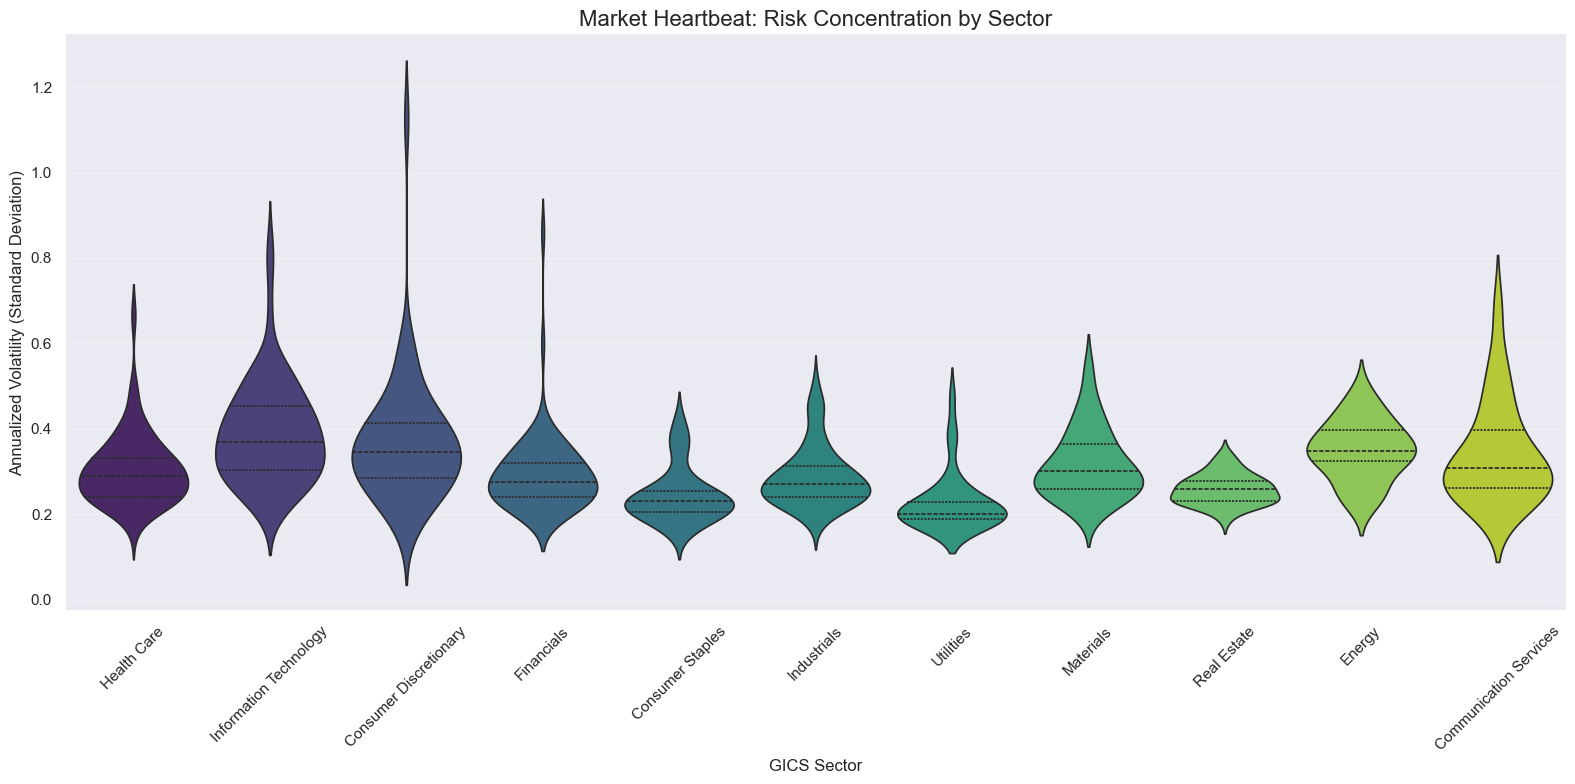

In [ ]:
########## Write your code in this cell ############
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = {'User-Agent': 'Mozilla/5.0'} 
response = requests.get(url, headers=headers)
table = pd.read_html(response.text)
sector_map = dict(zip(table[0]['Symbol'], table[0]['GICS Sector']))

vol_series = returns.std() * np.sqrt(252)

viz_df = pd.DataFrame({
    'Ticker': vol_series.index,
    'Volatility': vol_series.values,
    'Sector': vol_series.index.map(sector_map)
}).dropna()

plt.figure(figsize=(16, 8))

sns.violinplot(data=viz_df, x='Sector', y='Volatility', palette='viridis', inner="quartile")

plt.title('Market Heartbeat: Risk Concentration by Sector', fontsize=16)
plt.ylabel('Annualized Volatility (Standard Deviation)', fontsize=12)
plt.xlabel('GICS Sector', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

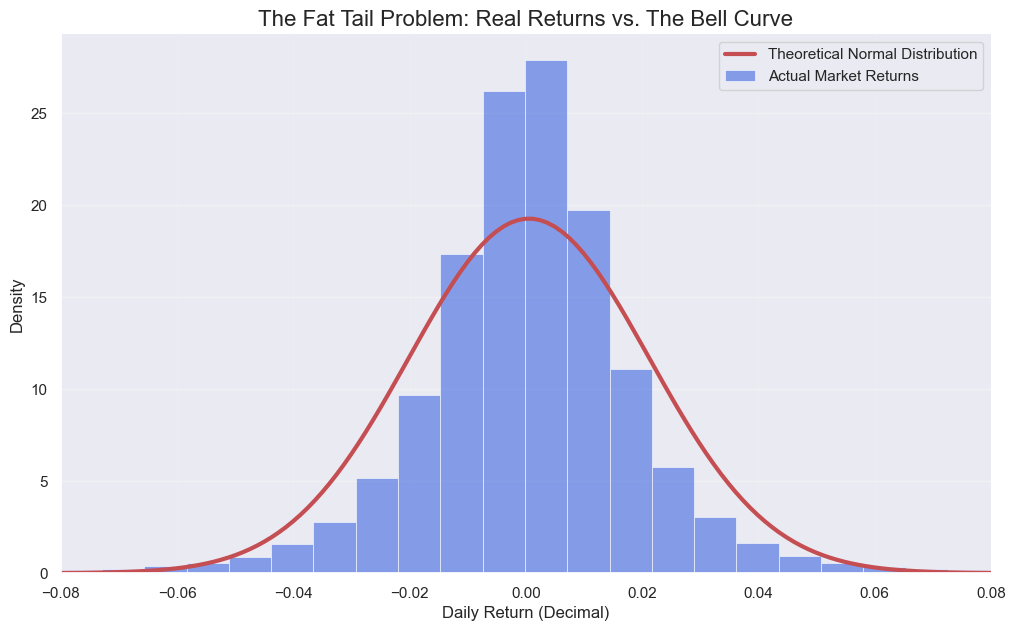

--- Market DNA Stats ---
Mean Daily Return: 0.00054
Volatility (Std Dev): 0.02070
Excess Kurtosis: 20.06


In [ ]:
from scipy.stats import norm, kurtosis

all_returns = returns.values.flatten()
all_returns = all_returns[~np.isnan(all_returns)]

plt.figure(figsize=(12, 7))

sns.histplot(all_returns, bins=150, kde=False, stat="density", color='royalblue', alpha=0.6, label='Actual Market Returns')

mu, std = all_returns.mean(), all_returns.std()
x = np.linspace(mu - 6*std, mu + 6*std, 200)
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=3, label='Theoretical Normal Distribution')

plt.title('The Fat Tail Problem: Real Returns vs. The Bell Curve', fontsize=16)
plt.xlabel('Daily Return (Decimal)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(-0.08, 0.08) 
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"--- Market DNA Stats ---")
print(f"Mean Daily Return: {mu:.5f}")
print(f"Volatility (Std Dev): {std:.5f}")
print(f"Excess Kurtosis: {kurtosis(all_returns):.2f}")

In [16]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

target_tickers = ['NVDA', 'AAPL', 'MSFT', 'TSLA']

print(f"Establishing data feed for: {target_tickers}...")
data = yf.download(target_tickers, period="2y", group_by='ticker', auto_adjust=True, threads=True) 

for ticker in target_tickers:
    
    try:
        stock_df = data[ticker]
    except KeyError:
        print(f"Could not retrieve data for {ticker}. Skipping.")
        continue

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.03, 
                        subplot_titles=(f'{ticker} Price Action', 'Volume Conviction'), 
                        row_heights=[0.7, 0.3])

    fig.add_trace(go.Candlestick(
        x=stock_df.index,
        open=stock_df['Open'],
        high=stock_df['High'],
        low=stock_df['Low'],
        close=stock_df['Close'],
        name='OHLC'
    ), row=1, col=1)

    fig.add_trace(go.Bar(
        x=stock_df.index, 
        y=stock_df['Volume'], 
        name='Volume',
        marker_color='rgba(128, 128, 128, 0.5)'
    ), row=2, col=1)

    
    fig.update_layout(
        template='plotly_dark',
        xaxis_rangeslider_visible=False,
        height=700,
        title_text=f"<b>Institutional Deep Dive: {ticker}</b>",
        title_x=0.5,
        showlegend=False
    )
    
    
    fig.update_yaxes(tickprefix="$", row=1, col=1)

    fig.show()

Establishing data feed for: ['NVDA', 'AAPL', 'MSFT', 'TSLA']...


[*********************100%***********************]  4 of 4 completed


## Part 3: The Correlation Matrix & Hierarchical Maps

**The Objective:** 
In a crisis, diversification is often the only "free lunch" in finance. However, that lunch disappears if all your stocks move in lockstep. To a Quant, a 500x500 correlation matrix is a map of hidden dependencies. However, looking at a raw table of 250,000 correlation pairs is impossible for the human eye. 

In this section, you will use **Hierarchical Clustering** to reorganize the S&P 500. Instead of listing stocks alphabetically (A-Z), we will use an algorithm to group stocks that "behave" similarly. This will reveal the true "Tribes" of the market, which may or may not align with their official industry sectors.

### Your Tasks:
1.  **Compute the Correlation Matrix:** Calculate the Pearson correlation coefficient for the daily returns of all stocks in your cleaned dataset.
2.  **The Hierarchical Clustermap:** Create a massive, high-resolution `clustermap`. Use a diverging color palette (e.g., `coolwarm` or `RdBu`) centered at zero.
    *   *Pro Tip:* Use the `method='ward'` or `method='complete'` in your clustering to find distinct, compact groups.
3.  **Identify the "Anti-Correlators":** Find and visualize the relationship between two stocks with a correlation close to zero or negative. In a sea of positive correlation, these are the "diversifiers."

### Critical Thinking Questions:
*   **Data vs. Label:** Look at the clusters formed by the algorithm. Do they perfectly match the official GICS sectors (e.g., does every "Energy" stock sit in the same cluster)? If a specific Tech stock is clustering with "Utilities," what does that tell you about its risk profile?
*   **The "Sea of Red":** During periods of extreme market stress, correlations tend to "go to 1.0" (everything falls together). If you were to run this analysis using only data from the 2008 or 2020 crashes, how would the visual density of the clustermap change?
*   **Spurious Correlation:** If you find two stocks that are 90% correlated but are in completely different industries (e.g., a Gold miner and a Tech company), is that a "signal" you can trade, or just a statistical coincidence? How would you test the difference?

---

C:\Users\ISMAIL\AppData\Local\Temp\ipykernel_32076\37625221.py:26: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.




================ CLUSTERS ================

Mixed / Macro Basket  |  n=138
['A', 'ABNB', 'ABT', 'ACN', 'ADP', 'AES', 'AKAM', 'ALGN', 'AMCR', 'APD', 'AVY', 'AZO', 'BA', 'BALL', 'BAX', 'BDX', 'BKNG', 'BR', 'BSX', 'CCL', 'CHTR', 'CMCSA', 'COO', 'COST', 'CPAY', 'CPRT', 'CRL', 'CSGP', 'CTAS', 'CTSH', 'DAL', 'DG', 'DGX', 'DHR', 'DIS', 'DLTR', 'DPZ', 'DRI', 'DVA', 'DXCM', 'EA', 'ECL', 'EFX', 'EIX', 'EPAM', 'EW', 'EXPE', 'FAST', 'FDS', 'FIS', 'FISV', 'FOX', 'FOXA', 'FSLR', 'GE', 'GEN', 'GPC', 'GPN', 'GRMN', 'GWW', 'HCA', 'HLT', 'HOLX', 'HSIC', 'HST', 'HWM', 'IBM', 'ICE', 'IDXX', 'IFF', 'IQV', 'ISRG', 'IT', 'JKHY', 'KR', 'LH', 'LIN', 'LUV', 'LVS', 'LW', 'LYV', 'MA', 'MAR', 'MCD', 'MCO', 'MDT', 'MGM', 'MO', 'MRNA', 'MSCI', 'MSI', 'MTD', 'NCLH', 'NDAQ', 'NEM', 'NWS', 'NWSA', 'ORLY', 'PAYX', 'PCG', 'PM', 'PODD', 'PPG', 'PSKY', 'RCL', 'RMD', 'ROP', 'ROST', 'RVTY', 'SHW', 'SPGI', 'STE', 'SW', 'SYK', 'SYY', 'T', 'TDG', 'TECH', 'TJX', 'TKO', 'TMO', 'TMUS', 'TSCO', 'TTWO', 'UAL', 'UHS', 'V', 'VRSK', '

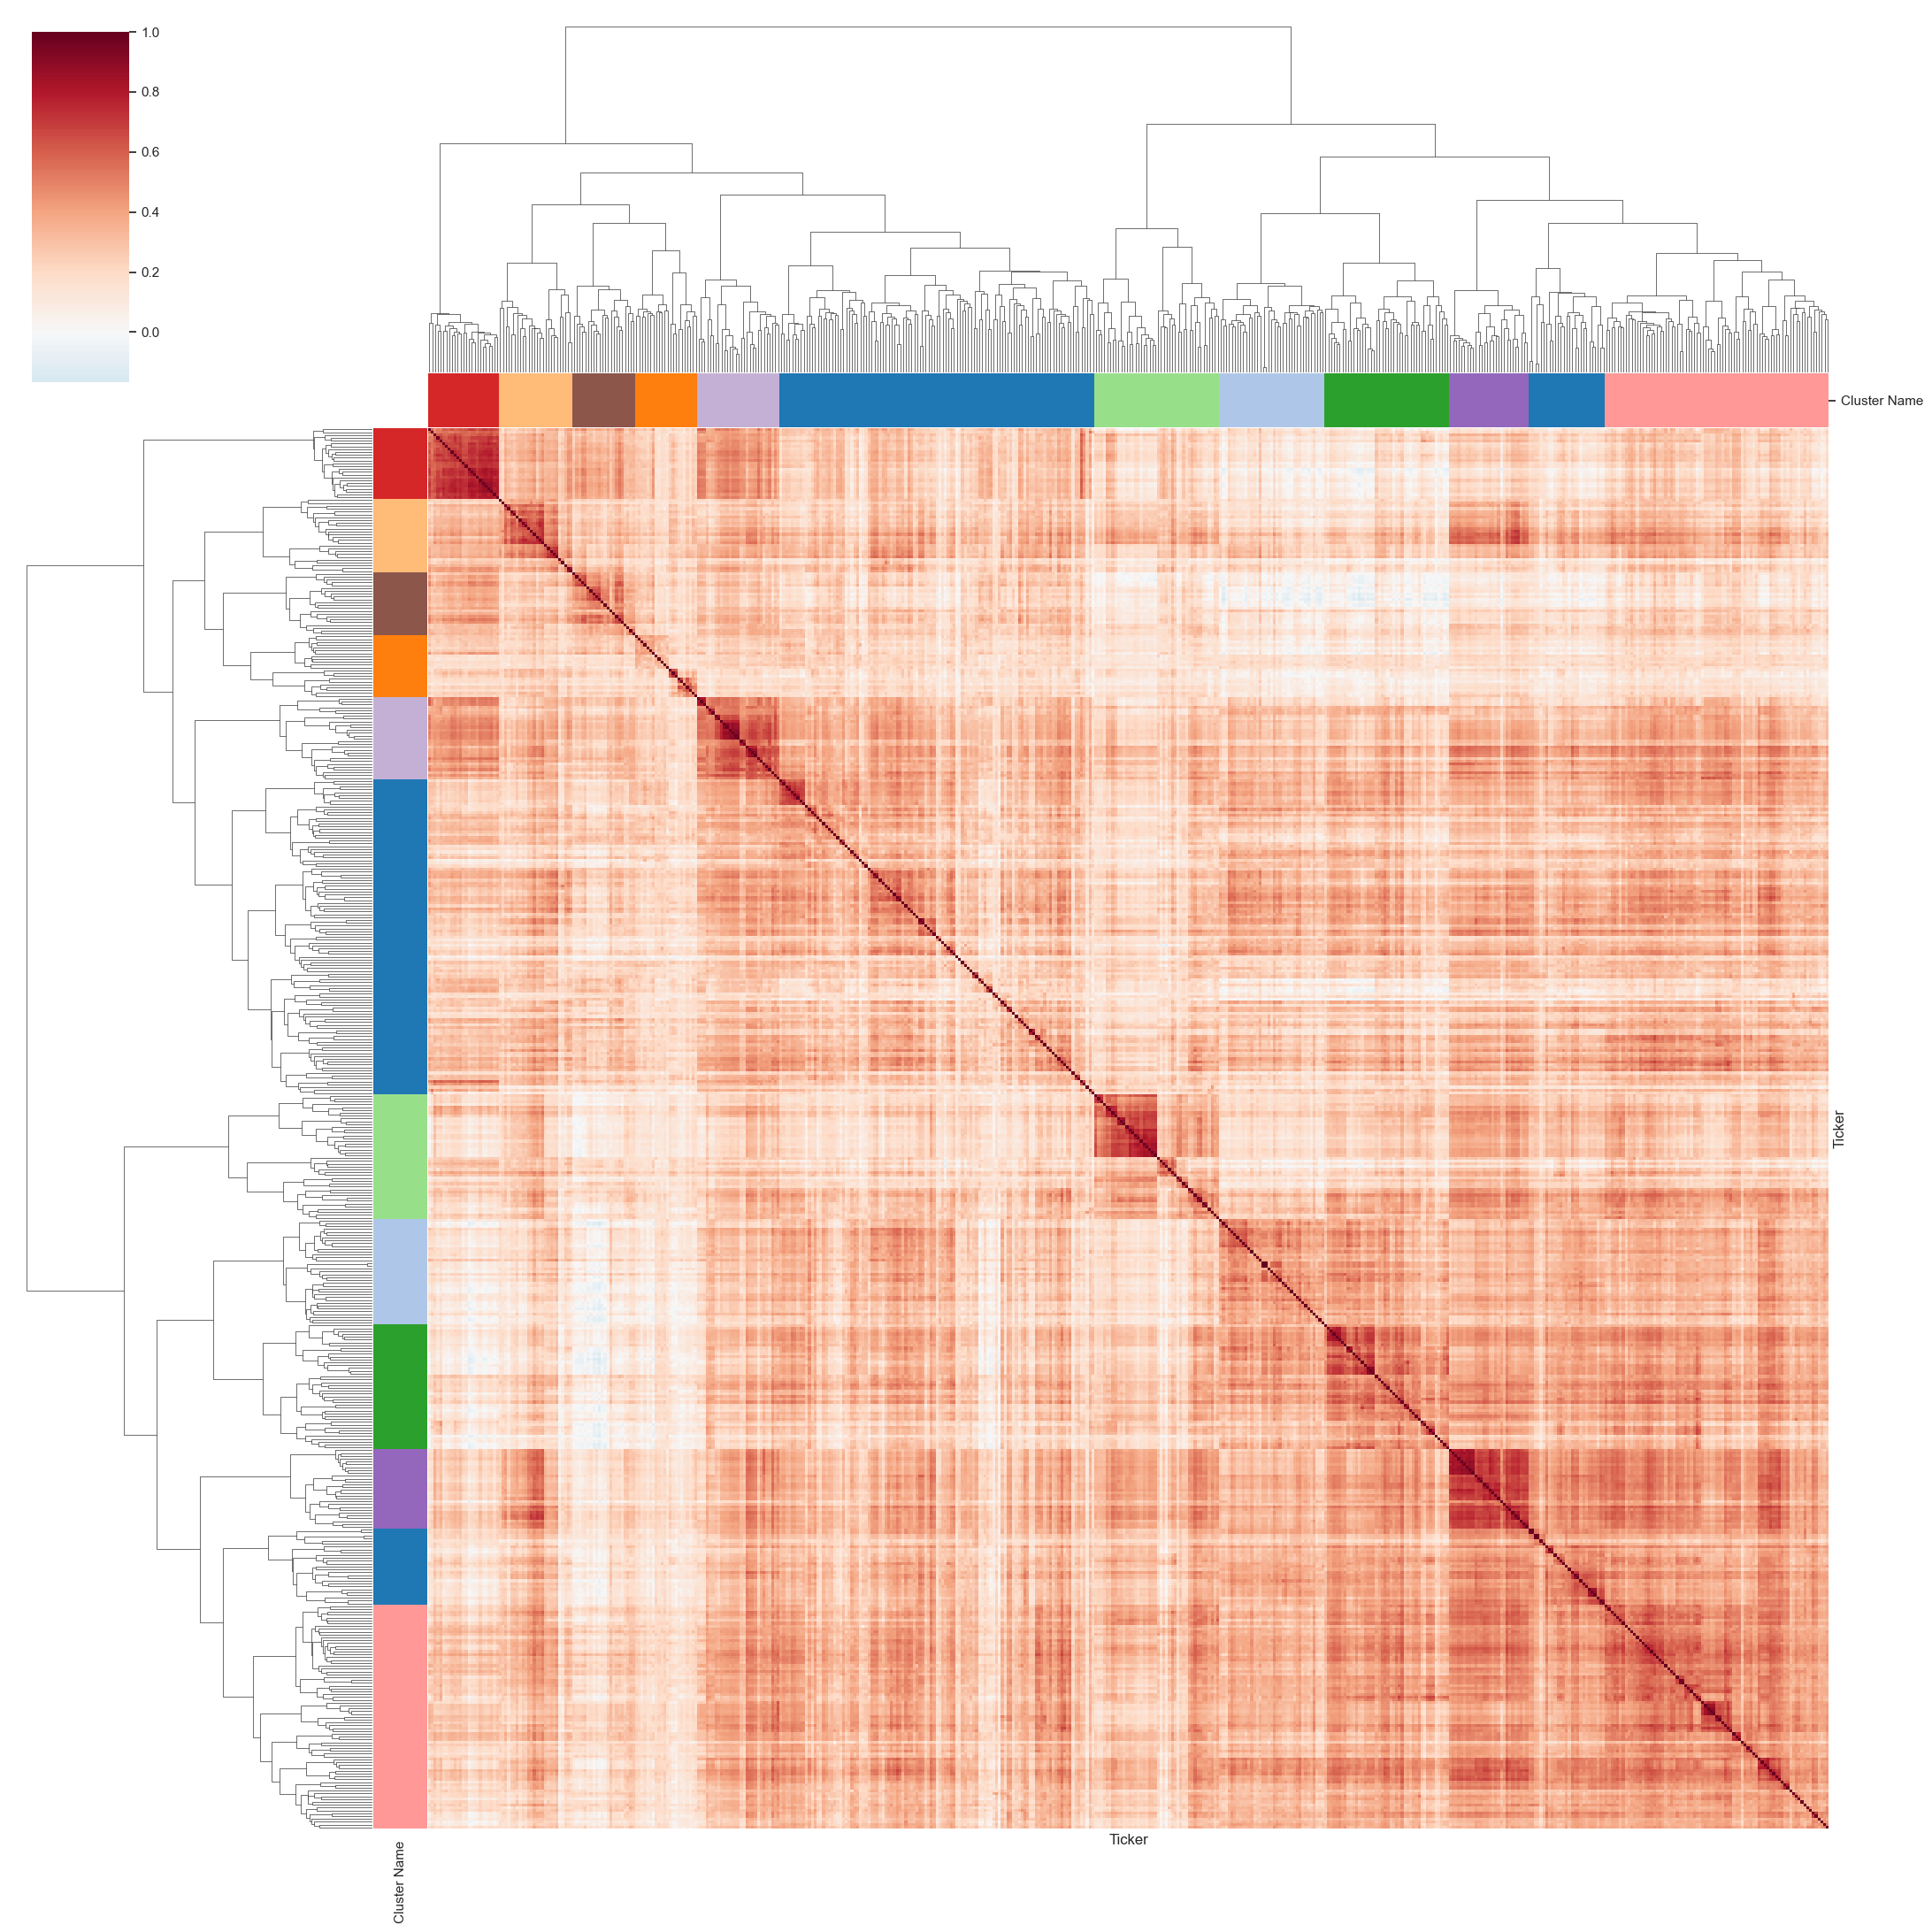


================ BEST DIVERSIFIERS ================
Ticker
KR      0.115529
HUM     0.129490
CBOE    0.131187
MCK     0.132407
DG      0.133334
CPB     0.138455
MOH     0.139023
CNC     0.142928
GIS     0.142941
NOC     0.143463
HRL     0.145509
NEM     0.147242
UNH     0.149392
LMT     0.150787
SW      0.151273
dtype: float64

================ MOST NEGATIVE PAIRS ================
Ticker  Ticker
GIS     NVDA     -0.166589
CRWD    GIS      -0.165737
GIS     MU       -0.151083
CPB     NVDA     -0.143078
GIS     PLTR     -0.136891
AMD     GIS      -0.135300
CAG     NVDA     -0.134823
GIS     SMCI     -0.134444
        WDC      -0.133135
CRWD    SJM      -0.132044
dtype: float64

================ EFFECTIVE DIVERSIFICATION ================
Effective independent bets: 9.7 out of 494 stocks


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

corr_matrix = returns.corr()
dist = np.sqrt(2 * (1 - corr_matrix))
link = linkage(squareform(dist), method='ward')

n_clusters = 12 

cluster_labels = fcluster(link, t=n_clusters, criterion='maxclust')
cluster_map = pd.Series(cluster_labels, index=corr_matrix.index)

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = {'User-Agent': 'Mozilla/5.0'}
table = pd.read_html(requests.get(url, headers=headers).text)[0]

sector_map = dict(zip(table['Symbol'], table['GICS Sector']))

cluster_df = pd.DataFrame({
    'Ticker': cluster_map.index,
    'Cluster': cluster_map.values
})

cluster_df['Sector'] = cluster_df['Ticker'].map(sector_map)
cluster_names = {}

for c in sorted(cluster_df['Cluster'].unique()):
    subset = cluster_df[cluster_df['Cluster'] == c]
    counts = subset['Sector'].value_counts()
    
    if len(counts) == 0:
        name = "Unknown"
    else:
        top_sector = counts.index[0]
        pct = counts.iloc[0] / counts.sum()
        
        if pct < 0.50:
            name = "Mixed / Macro Basket"
        else:
            name = f"{top_sector} ({pct:.0%})"
    
    cluster_names[c] = name

cluster_df['Cluster Name'] = cluster_df['Cluster'].map(cluster_names)

print("\n================ CLUSTERS ================")

for name in cluster_df['Cluster Name'].unique():
    members = cluster_df[cluster_df['Cluster Name'] == name]['Ticker'].tolist()
    print(f"\n{name}  |  n={len(members)}")
    print(members)

unique_names = cluster_df['Cluster Name'].unique()
palette = sns.color_palette("tab20", len(unique_names))
color_dict = dict(zip(unique_names, palette))
row_colors = cluster_df.set_index('Ticker')['Cluster Name'].map(color_dict)

sns.clustermap(
    corr_matrix,
    row_linkage=link,
    col_linkage=link,
    cmap='RdBu_r',
    center=0,
    row_colors=row_colors,
    col_colors=row_colors,
    xticklabels=False,
    yticklabels=False,
    figsize=(22,22)
)

plt.show()

avg_corr = corr_matrix.mean().sort_values()

print("\n================ BEST DIVERSIFIERS ================")
print(avg_corr.head(15))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
pairs = corr_matrix.where(mask).stack()

print("\n================ MOST NEGATIVE PAIRS ================")
print(pairs.sort_values().head(10))

eigvals = np.linalg.eigvals(corr_matrix)

N_eff = (eigvals.sum()**2) / (eigvals**2).sum()

print("\n================ EFFECTIVE DIVERSIFICATION ================")
print(f"Effective independent bets: {N_eff:.1f} out of {len(corr_matrix)} stocks")



Top 10 most negative correlations:

Ticker  Ticker
GIS     NVDA     -0.166589
CRWD    GIS      -0.165737
GIS     MU       -0.151083
CPB     NVDA     -0.143078
GIS     PLTR     -0.136891
AMD     GIS      -0.135300
CAG     NVDA     -0.134823
GIS     SMCI     -0.134444
        WDC      -0.133135
CRWD    SJM      -0.132044
dtype: float64


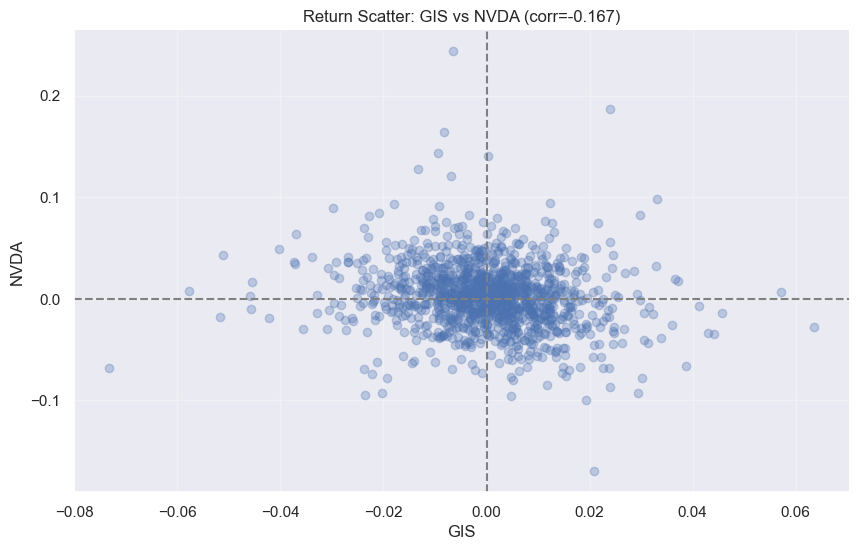

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
pairs = corr_matrix.where(mask).stack()

lowest_pairs = pairs.sort_values().head(10)
print("\nTop 10 most negative correlations:\n")
print(lowest_pairs)

stock1, stock2 = lowest_pairs.index[0]

plt.figure(figsize=(10,6))
plt.scatter(returns[stock1], returns[stock2], alpha=0.3)
plt.xlabel(stock1)
plt.ylabel(stock2)
plt.title(f"Return Scatter: {stock1} vs {stock2} (corr={lowest_pairs.iloc[0]:.3f})")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.show()

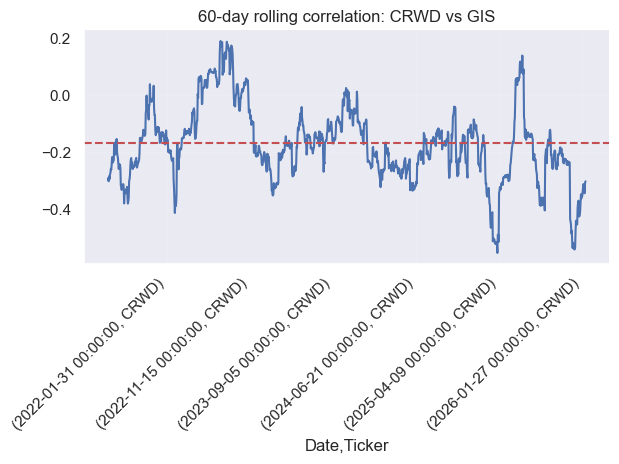

In [ ]:
pair = ('CRWD', 'GIS')
rolling_corr = returns[list(pair)].rolling(window=60).corr().iloc[0::2, 1]
rolling_corr.plot(title=f"60-day rolling correlation: {pair[0]} vs {pair[1]}")
plt.axhline(y=pairs[pair], color='r', linestyle='--', label='Full sample corr')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

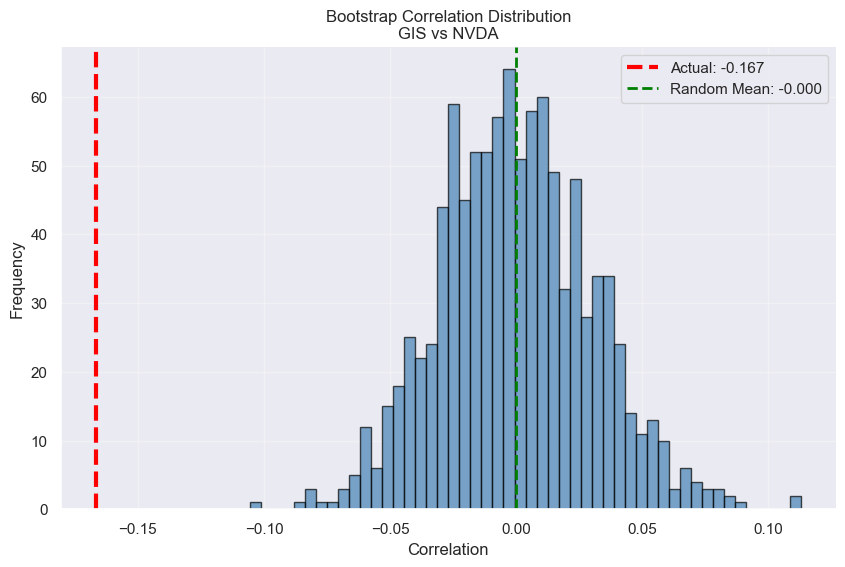

In [ ]:
# Bootstrap to see distribution of correlations
np.random.seed(42)
n_bootstraps = 1000
bootstrap_corrs = []

for _ in range(n_bootstraps):
    shuffled_idx = np.random.permutation(len(returns))
    shuffled_returns = returns[stock2].iloc[shuffled_idx].values
    shuffled_returns = pd.Series(shuffled_returns, index=returns.index)
    
    corr = returns[stock1].corr(shuffled_returns)
    bootstrap_corrs.append(corr)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_corrs, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(x=pairs[(stock1, stock2)], color='red', linestyle='--', 
            linewidth=3, label=f'Actual: {pairs[(stock1, stock2)]:.3f}')
plt.axvline(x=np.mean(bootstrap_corrs), color='green', linestyle='--',
            linewidth=2, label=f'Random Mean: {np.mean(bootstrap_corrs):.3f}')
plt.title(f'Bootstrap Correlation Distribution\n{stock1} vs {stock2}')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


C:\Users\ISMAIL\AppData\Local\Temp\ipykernel_32076\2866615769.py:53: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.




================ CRISIS CLUSTERS ================

Mixed / Macro Basket | n=152
['A', 'ABNB', 'ABT', 'ADM', 'ADP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALGN', 'AMT', 'AON', 'APO', 'APTV', 'ARES', 'AWK', 'BA', 'BALL', 'BEN', 'BG', 'BKNG', 'BLK', 'BR', 'BRO', 'BX', 'CAT', 'CBOE', 'CCI', 'CCL', 'CF', 'CME', 'CPAY', 'CRL', 'CTAS', 'CTVA', 'DAL', 'DE', 'DGX', 'DHR', 'DLR', 'DOW', 'DPZ', 'DXCM', 'EA', 'EPAM', 'EQIX', 'ERIE', 'EW', 'EXPE', 'F', 'FAST', 'FCX', 'FDS', 'FIS', 'FISV', 'FOX', 'FOXA', 'FSLR', 'GD', 'GE', 'GEN', 'GM', 'GPN', 'GWW', 'HAS', 'HII', 'HLT', 'HOLX', 'HST', 'HWM', 'ICE', 'IDXX', 'IP', 'IQV', 'ISRG', 'IVZ', 'J', 'JKHY', 'KKR', 'LDOS', 'LH', 'LHX', 'LMT', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAR', 'MCD', 'MCO', 'MGM', 'MNST', 'MOS', 'MRNA', 'MRSH', 'MSCI', 'MTD', 'NCLH', 'NDAQ', 'NEE', 'NOC', 'NRG', 'NUE', 'NWS', 'NWSA', 'ORCL', 'OTIS', 'PAYX', 'PCG', 'PKG', 'PODD', 'PSKY', 'PWR', 'RCL', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBAC', 'SPGI', 'STLD', 'SW', 'SYY', 'TDG', 'T

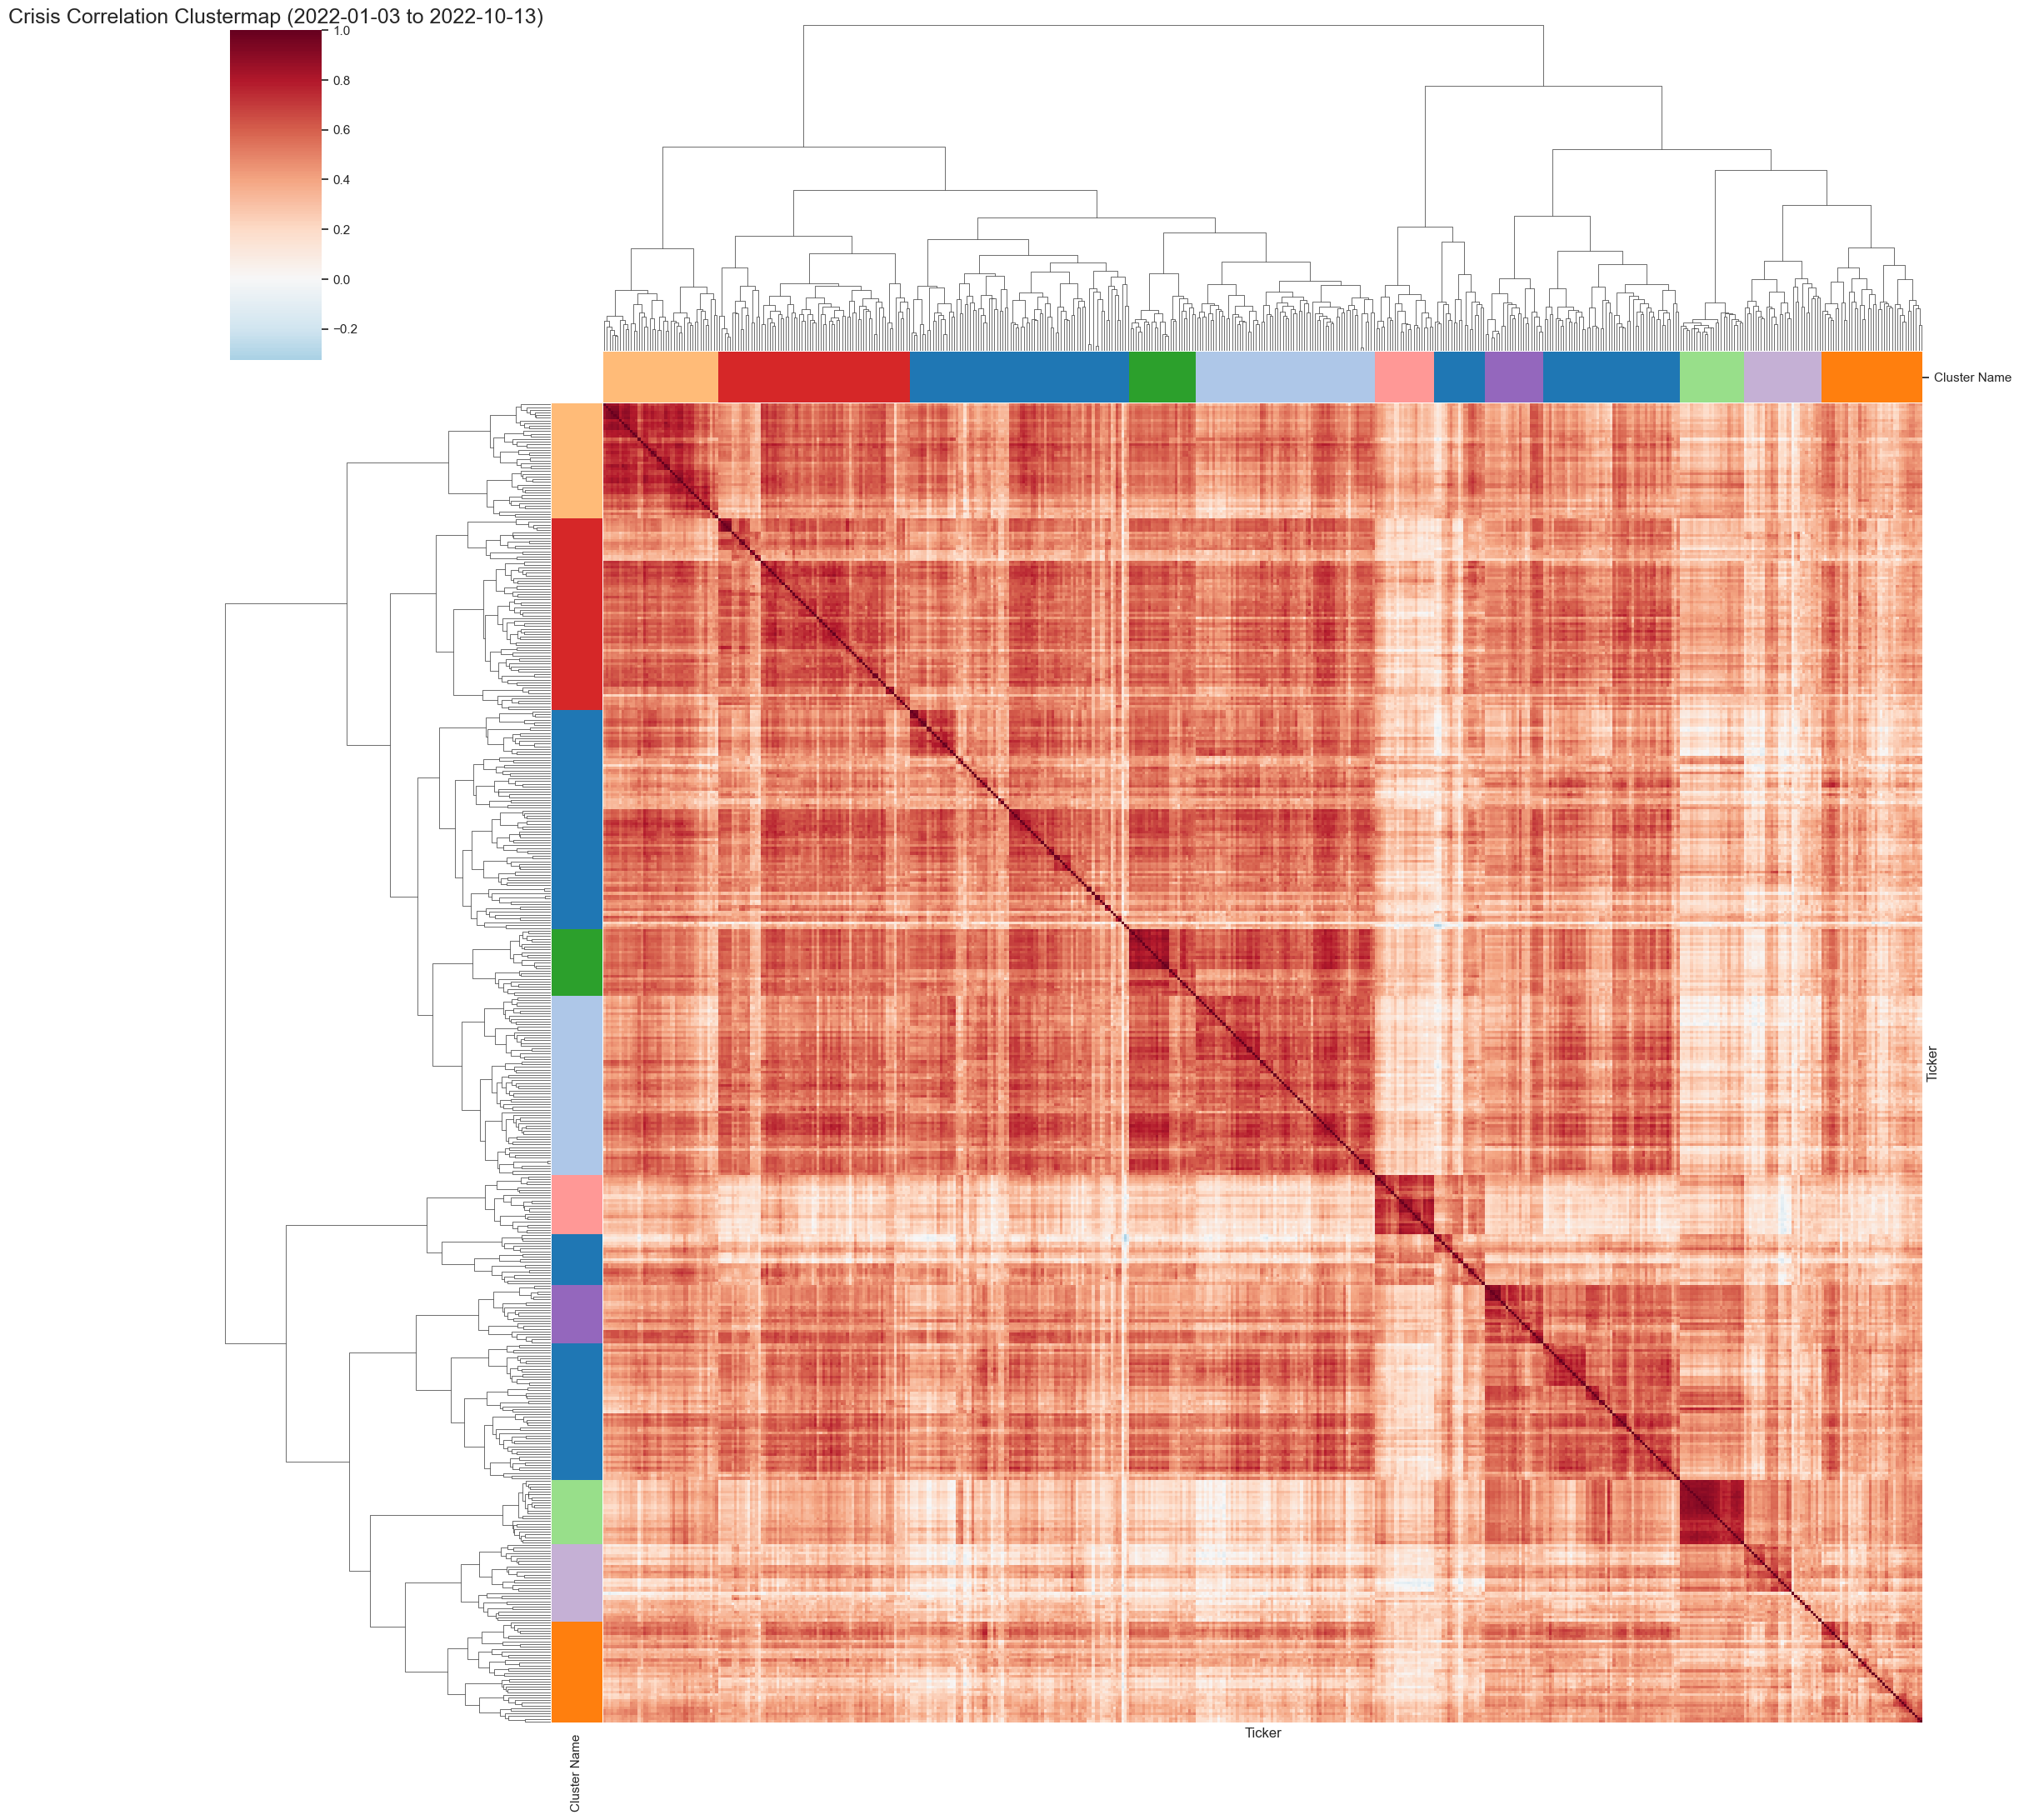


Average pairwise correlation during crisis: 0.417


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

crisis_start = '2022-01-03'
crisis_end   = '2022-10-13'

returns_crisis = returns.loc[crisis_start:crisis_end]
returns_crisis = returns_crisis.dropna(axis=1, how='all')  

if returns_crisis.shape[1] == 0:
    raise ValueError("No tickers with valid returns in this crisis period.")

corr_crisis = returns_crisis.corr()
corr_crisis = corr_crisis.dropna(axis=0, how='any').dropna(axis=1, how='any')

dist = np.sqrt(2 * (1 - corr_crisis.values))
dist = (dist + dist.T) / 2  
link = linkage(squareform(dist), method='ward')

cluster_labels = fcluster(link, t=n_clusters, criterion='maxclust')
cluster_map = pd.Series(cluster_labels, index=corr_crisis.index)

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
headers = {'User-Agent': 'Mozilla/5.0'}
table = pd.read_html(requests.get(url, headers=headers).text)[0]
sector_map = dict(zip(table['Symbol'], table['GICS Sector']))

cluster_df = pd.DataFrame({
    'Ticker': cluster_map.index,
    'Cluster': cluster_map.values
})
cluster_df['Sector'] = cluster_df['Ticker'].map(sector_map)

cluster_names = {}
for c in sorted(cluster_df['Cluster'].unique()):
    subset = cluster_df[cluster_df['Cluster'] == c]
    counts = subset['Sector'].value_counts()
    if len(counts) == 0:
        name = "Unknown"
    else:
        top_sector = counts.index[0]
        pct = counts.iloc[0] / counts.sum()
        if pct < 0.50:
            name = "Mixed / Macro Basket"
        else:
            name = f"{top_sector} ({pct:.0%})"
    cluster_names[c] = name

cluster_df['Cluster Name'] = cluster_df['Cluster'].map(cluster_names)


print("\n================ CRISIS CLUSTERS ================")
for name in cluster_df['Cluster Name'].unique():
    members = cluster_df[cluster_df['Cluster Name'] == name]['Ticker'].tolist()
    print(f"\n{name} | n={len(members)}")
    print(members)

unique_names = cluster_df['Cluster Name'].unique()
palette = sns.color_palette("tab20", len(unique_names))
color_dict = dict(zip(unique_names, palette))
row_colors = cluster_df.set_index('Ticker')['Cluster Name'].map(color_dict)

sns.clustermap(
    corr_crisis,
    row_linkage=link,
    col_linkage=link,
    cmap='RdBu_r',
    center=0,
    row_colors=row_colors,
    col_colors=row_colors,
    xticklabels=False,
    yticklabels=False,
    figsize=(22,22)
)
plt.title(f"Crisis Correlation Clustermap ({crisis_start} to {crisis_end})", fontsize=18)
plt.show()


avg_corr = corr_crisis.values[np.triu_indices_from(corr_crisis, k=1)].mean()
print(f"\nAverage pairwise correlation during crisis: {avg_corr:.3f}")


## Part 4: The Market Map: Dimensionality Reduction (PCA & t-SNE)

**The Objective:** 
This is where we enter the "Black Magic" of quantitative research. Currently, your dataset has over 1000 dimensions (one for every every market day) and about 500 rows (one for every stock. If this is not yet the case, transpose your dataset). As humans, we cannot visualize 1000+-dimensional space. To find the "latent" structure of the market, we must use **Dimensionality Reduction**.

We will use two primary tools:
1.  **PCA (Principal Component Analysis)** PCA may tell us what percentage of the market's movement is driven by a single "Market Factor" (The first Principal Component).
2.  **t-SNE (t-Distributed Stochastic Neighbor Embedding) or UMAP:** Non-linear techniques that are incredibly powerful for visualization. They attempt to keep "similar" stocks close together in 2D space, effectively creating a "Topographical Map" of the S&P 500.

### Your Tasks:
1.  **The Scree Plot:** Run PCA on your normalized returns. Plot the "Explained Variance Ratio." How many "components" does it take to explain 50% of the market's movement?
2.  **The 2D Projection:** Use **t-SNE** (or UMAP) to project the ~500 stocks into a 2-dimensional scatter plot. 
3.  **The Sector Overlay:** Color-code the dots in your scatter plot by their **GICS Sector** (Information Technology, Energy, etc.). 
4.  **Identify the Outliers:** Annotate the map (such that the name of a stock is revealed when the mouse hovers over it). Find the stocks that are "Socially Distancing" i.e. those that sit far away from their sector peers or in the middle of a different cluster entirely.

### Critical Thinking Questions:
*   **The Market Factor:** In your PCA analysis, you will likely find that the first component (PC1) explains a massive amount of variance. What do you think PC1 represents in the real world? (Hint: If every stock goes down at the same time, what is that called?)*   **Portfolios:** How would a portfolio based on PC1 be advantageous compared to a portfolio based on PC2 ? How would a portfolio based on PC2 be advantageous compared to a portfolio based on PC1 ? (Hint: think in terms of variance) 
*   **Linear vs. Non-Linear:** Compare your correlation clustermap from Part 3 with your t-SNE map here. Which one makes it easier to spot "anomalous" companies that don't belong with their peers?
*   **The "Misplaced" Stock:** If you see a "Technology" stock sitting deep inside the "Healthcare" cluster in your 2D map, does that necessarily mean your code is wrong, or is the market telling you something about that company's actual revenue stream?

---

In [ ]:
# metadata.csv is a sector foler for returns.csv file
metadata_df = sp500_df[['Symbol', 'GICS Sector']].copy()
metadata_df['Symbol'] = metadata_df['Symbol'].str.replace('.', '-', regex=False)
metadata_df = metadata_df.set_index('Symbol')
metadata_df.to_csv("metadata.csv")
print("metadata.csv saved successfully!")

metadata.csv saved successfully!


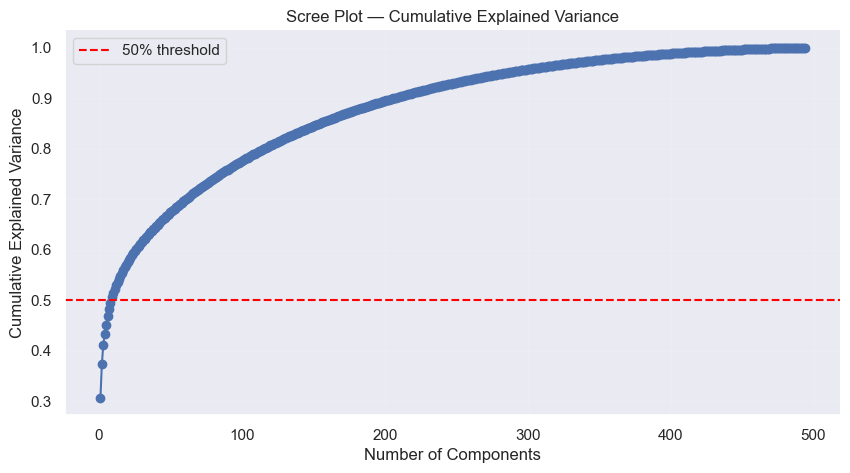

Components needed for 50% variance: 9


In [18]:
########## Write your code in this cell ############
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

norm_returns = (returns - returns.mean()) / returns.std()


tickers = norm_returns.columns.tolist()


pca = PCA()
pca.fit(norm_returns)

explained = pca.explained_variance_ratio_
cum_explained = explained.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained) + 1), cum_explained, marker='o')
plt.axhline(0.50, color='red', linestyle='--', label='50% threshold')
plt.title("Scree Plot — Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.show()

n_components_50 = np.argmax(cum_explained >= 0.50) + 1
print(f"Components needed for 50% variance: {n_components_50}")

In [ ]:
n_samples = norm_returns.T.shape[0]
perplexity_value = min(30, n_samples - 1)

tsne = TSNE(
    n_components=2,
    perplexity=perplexity_value,
    learning_rate='auto',
    init='pca',
    random_state=42
)

tsne_coords = tsne.fit_transform(norm_returns.T)
print("Task 2 complete — t-SNE coordinates computed.")

Task 2 complete — t-SNE coordinates computed.


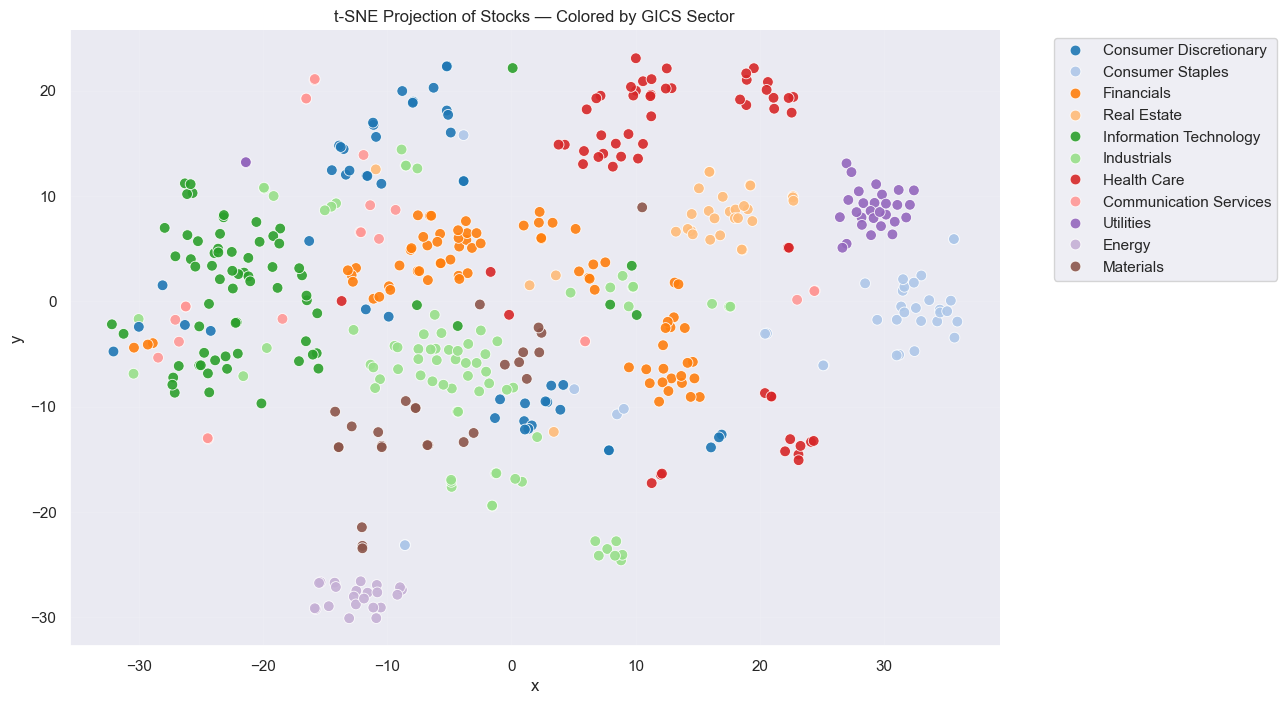

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


common = list(set(tickers).intersection(metadata_df.index))

norm_returns = norm_returns[common]
sector_map = metadata_df.loc[common, "GICS Sector"]
tickers = common

tsne_coords = tsne.fit_transform(norm_returns.T)

plot_df = pd.DataFrame({
    "x": tsne_coords[:, 0],
    "y": tsne_coords[:, 1],
    "sector": sector_map.values,
    "ticker": tickers
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=plot_df,
    x="x", y="y",
    hue="sector",
    palette="tab20",
    s=60,
    alpha=0.9
)
plt.title("t-SNE Projection of Stocks — Colored by GICS Sector")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    plot_df,
    x="x", y="y",
    color="sector",
    hover_name="ticker",
    title="Interactive t-SNE Map — Hover to Identify Outliers",
    width=900, height=600
)
fig.show()